Original Dataset with Missing Values & Text:
   Years_Exp Education  Salary
0        1.1  Bachelor   39343
1        1.3  Bachelor   46205
2        1.5    Master   37731
3        2.0  Bachelor   43525
4        2.2       PhD   39891

 Model Evaluation:
Final RMSE: $7593.32
R2 Score: 0.8094


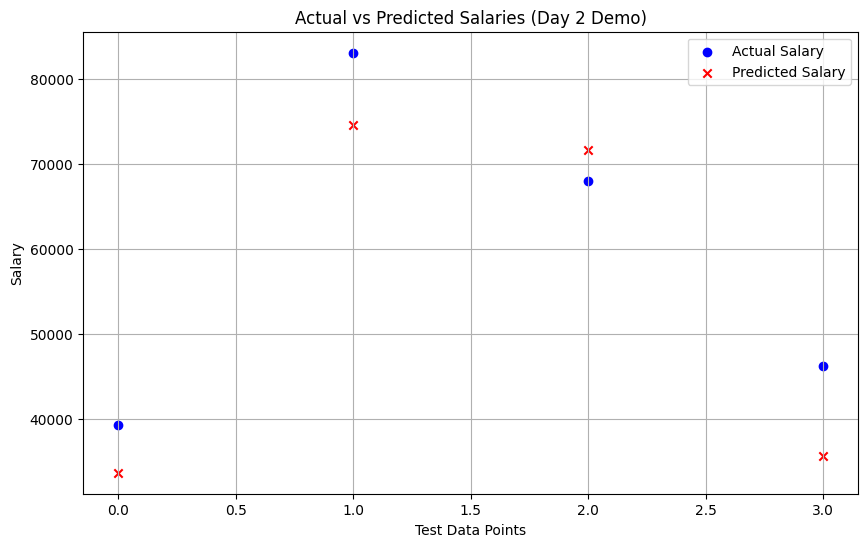


 Demo Completed Successfully!


In [16]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = {
    'Years_Exp': [1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7, np.nan, 4.0, 4.0, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6.0],
    'Education': ['Bachelor', 'Bachelor', 'Master', 'Bachelor', 'PhD', 'Master', 'Bachelor', 'Master', 'PhD', 'Bachelor', 'Master', 'PhD', 'Bachelor', 'Master', 'Bachelor', 'PhD', 'Master', 'Bachelor', 'PhD', 'Master'],
    'Salary': [39343, 46205, 37731, 43525, 39891, 56642, 60150, 54445, 64445, 57189, 63218, 55794, 56957, 57081, 61111, 67938, 66029, 83088, 81363, 93940]
}

df = pd.DataFrame(data)
print("Original Dataset with Missing Values & Text:")
print(df.head())

# A. Handle Missing Values (Median for Years_Exp)
df['Years_Exp'] = df['Years_Exp'].fillna(df['Years_Exp'].median())

# B. Encoding (Label Encoding for Education: Bachelor=0, Master=1, PhD=2)
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])

# C. Feature Selection
X = df[['Years_Exp', 'Education']]
y = df['Salary']

# D. Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# E. Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------------------
# 3. MODELING (Multiple Linear Regression)
# ------------------------------------------
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# ------------------------------------------
# 4. EVALUATION & VISUALIZATION
# ------------------------------------------
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n Model Evaluation:")
print(f"Final RMSE: ${rmse:.2f}")
print(f"R2 Score: {r2:.4f}")

# Visualizing results
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Salary', marker='o')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Salary', marker='x')
plt.title('Actual vs Predicted Salaries (Day 2 Demo)')
plt.xlabel('Test Data Points')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

print("\n Demo Completed Successfully!")